#  Wafer fault Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

## # Import Required Libraries:

In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
## Load the feature store dataset as dataframe

file_path = r"Wafer_dataset.csv"
wafers = pd.read_csv(file_path)
print("Shape of the feature store dataset: ", wafers.shape)
wafers.head()

Shape of the feature store dataset:  (1537, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-501,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,...,64.2405,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405,-1
1,Wafer-502,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,...,0.0000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000,-1
2,Wafer-503,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,...,NaN,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000,-1
3,Wafer-504,2997.28,2357.99,2141.0667,1236.5212,0.9698,100.0,98.3344,0.1238,1.5973,...,NaN,0.4962,0.0086,0.0024,1.7297,-0.0012,0.0252,0.0081,0.0000,-1
4,Wafer-505,3025.10,2475.18,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.5525,...,NaN,0.4983,0.0159,0.0041,3.1927,-0.0012,0.0252,0.0081,0.0000,-1


In [6]:
wafers.drop(columns = ["Unnamed: 0", 'Good/Bad']).iloc[:100].to_csv("test.csv", index = False)

In [7]:
#replace the column unnamed: 0 as wafer

wafers.rename(columns={"Unnamed: 0": "Wafer"}, inplace= True)

In [8]:
## Train-Test Split

from sklearn.model_selection import train_test_split

wafers, wafers_test = train_test_split(wafers, test_size=.20, random_state=42)

In [9]:
## Wafers' Info

wafers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229 entries, 845 to 1126
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(590), int64(1), object(1)
memory usage: 5.6+ MB


In [10]:
## Description of `wafers`

wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,1225.000000,1223.000000,1218.000000,1218.000000,1218.000000,1218.0,1218.000000,1221.000000,1227.000000,1227.000000,...,476.000000,1228.000000,1228.000000,1228.000000,1228.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,3015.867176,2495.221398,2200.779313,1396.608481,4.991320,100.0,101.133648,0.121762,1.462828,-0.000682,...,96.613229,0.500158,0.015134,0.003799,3.028931,0.021297,0.016466,0.005293,98.804514,-0.882832
std,74.037640,81.216553,28.998127,430.068789,63.617705,0.0,6.215496,0.009437,0.073260,0.015148,...,87.674458,0.003334,0.013972,0.003018,2.910214,0.012460,0.008997,0.002935,93.572846,0.469881
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.200500,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2968.780000,2451.215000,2181.713875,1085.926875,1.020300,100.0,97.793350,0.121100,1.411550,-0.010650,...,45.696175,0.498100,0.011600,0.003100,2.323475,0.013400,0.010500,0.003300,44.176600,-1.000000
50%,3013.150000,2497.620000,2201.822200,1288.250400,1.316800,100.0,101.502200,0.122400,1.461600,-0.001000,...,71.047500,0.500200,0.013800,0.003600,2.761700,0.020300,0.014800,0.004600,71.533300,-1.000000
75%,3057.030000,2539.545000,2218.055500,1593.122000,1.529100,100.0,104.674750,0.123800,1.515250,0.008600,...,114.413350,0.502400,0.016600,0.004100,3.315975,0.027500,0.020500,0.006400,114.287800,-1.000000
max,3356.350000,2846.440000,2306.100000,3619.739700,1114.536600,100.0,129.252200,0.127600,1.656400,0.060900,...,737.304800,0.509800,0.471400,0.103900,98.662800,0.102800,0.079900,0.028600,737.304800,1.000000


### Insight:

From the gist of only shown columns, it looks like some of features have pretty bad outliers. One thing is for sure, the data must be standardized.

In [11]:
## Looking at the Cats in our Target feature

wafers["Good/Bad"].value_counts()

Good/Bad
-1    1157
 1      72
Name: count, dtype: int64

### Insight:

Heavily imbalanced. Definitely gonna need `resampling`.

## # Analyze Missing Data:

Firstly, we'll check the missing data in the target feature and drop those records. **As if we already know a value of target feature then there's no need for a ML algorithm, damn right?** Therefore, the best way to deal with missing target entries is to delete them. For other missing features, we can definitely use impute strategies.

In [12]:
## Check missing vals in target feature

wafers["Good/Bad"].isna().sum()

np.int64(0)

**=>** Woa, not even a single missing entry, I didn't see that coming.

In [13]:
wafers.isna().sum().sum()

np.int64(33032)

In [14]:
## Check missing vals in dependent feature variables

wafers.isna().sum().sum() / (wafers.shape[0] * (wafers.shape[1] - 1))

np.float64(0.045477387280594875)

**=>** Almost 4% out of total cells we're having, are missing.

We're gonna try all sort of imputation strategies and would choose the one with that's gonna give us least overall-error-val.

## # Visualization of Sensors' distribution:

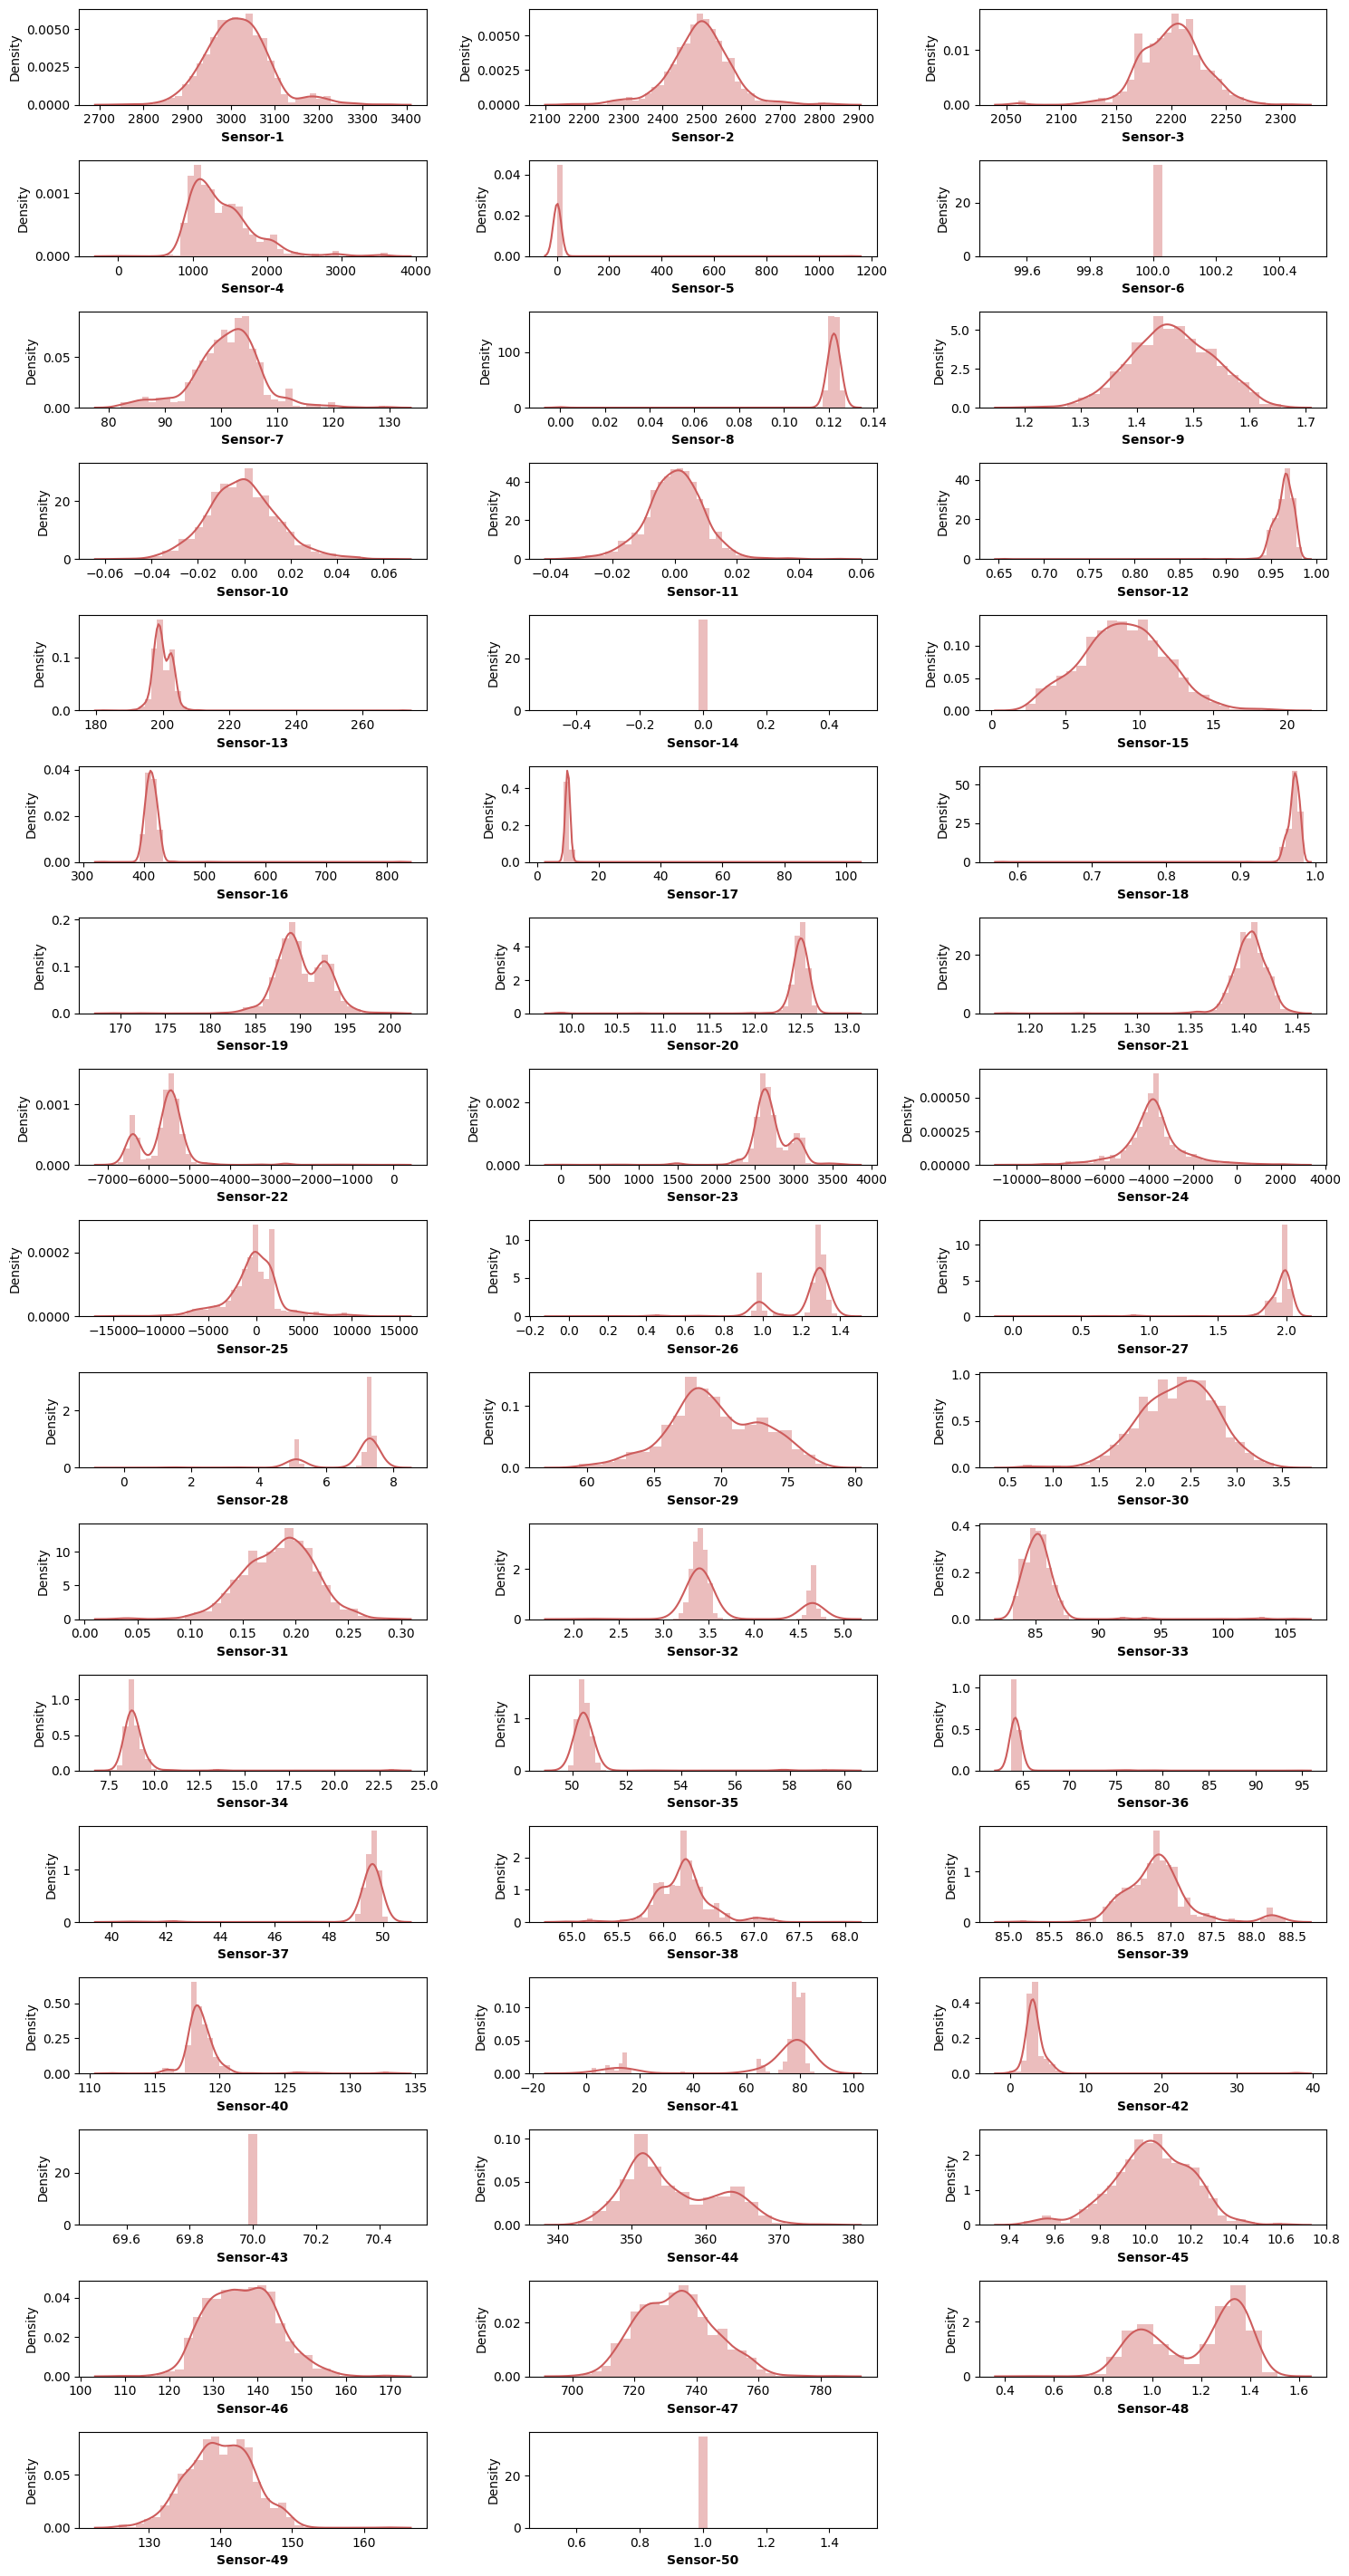

In [15]:
# let's have a look at the distribution first 50 sensors of Wafers

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [16]:
# Select 50 random sensors

random_50_sensors_idx = []
for i in range(50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1, 591))

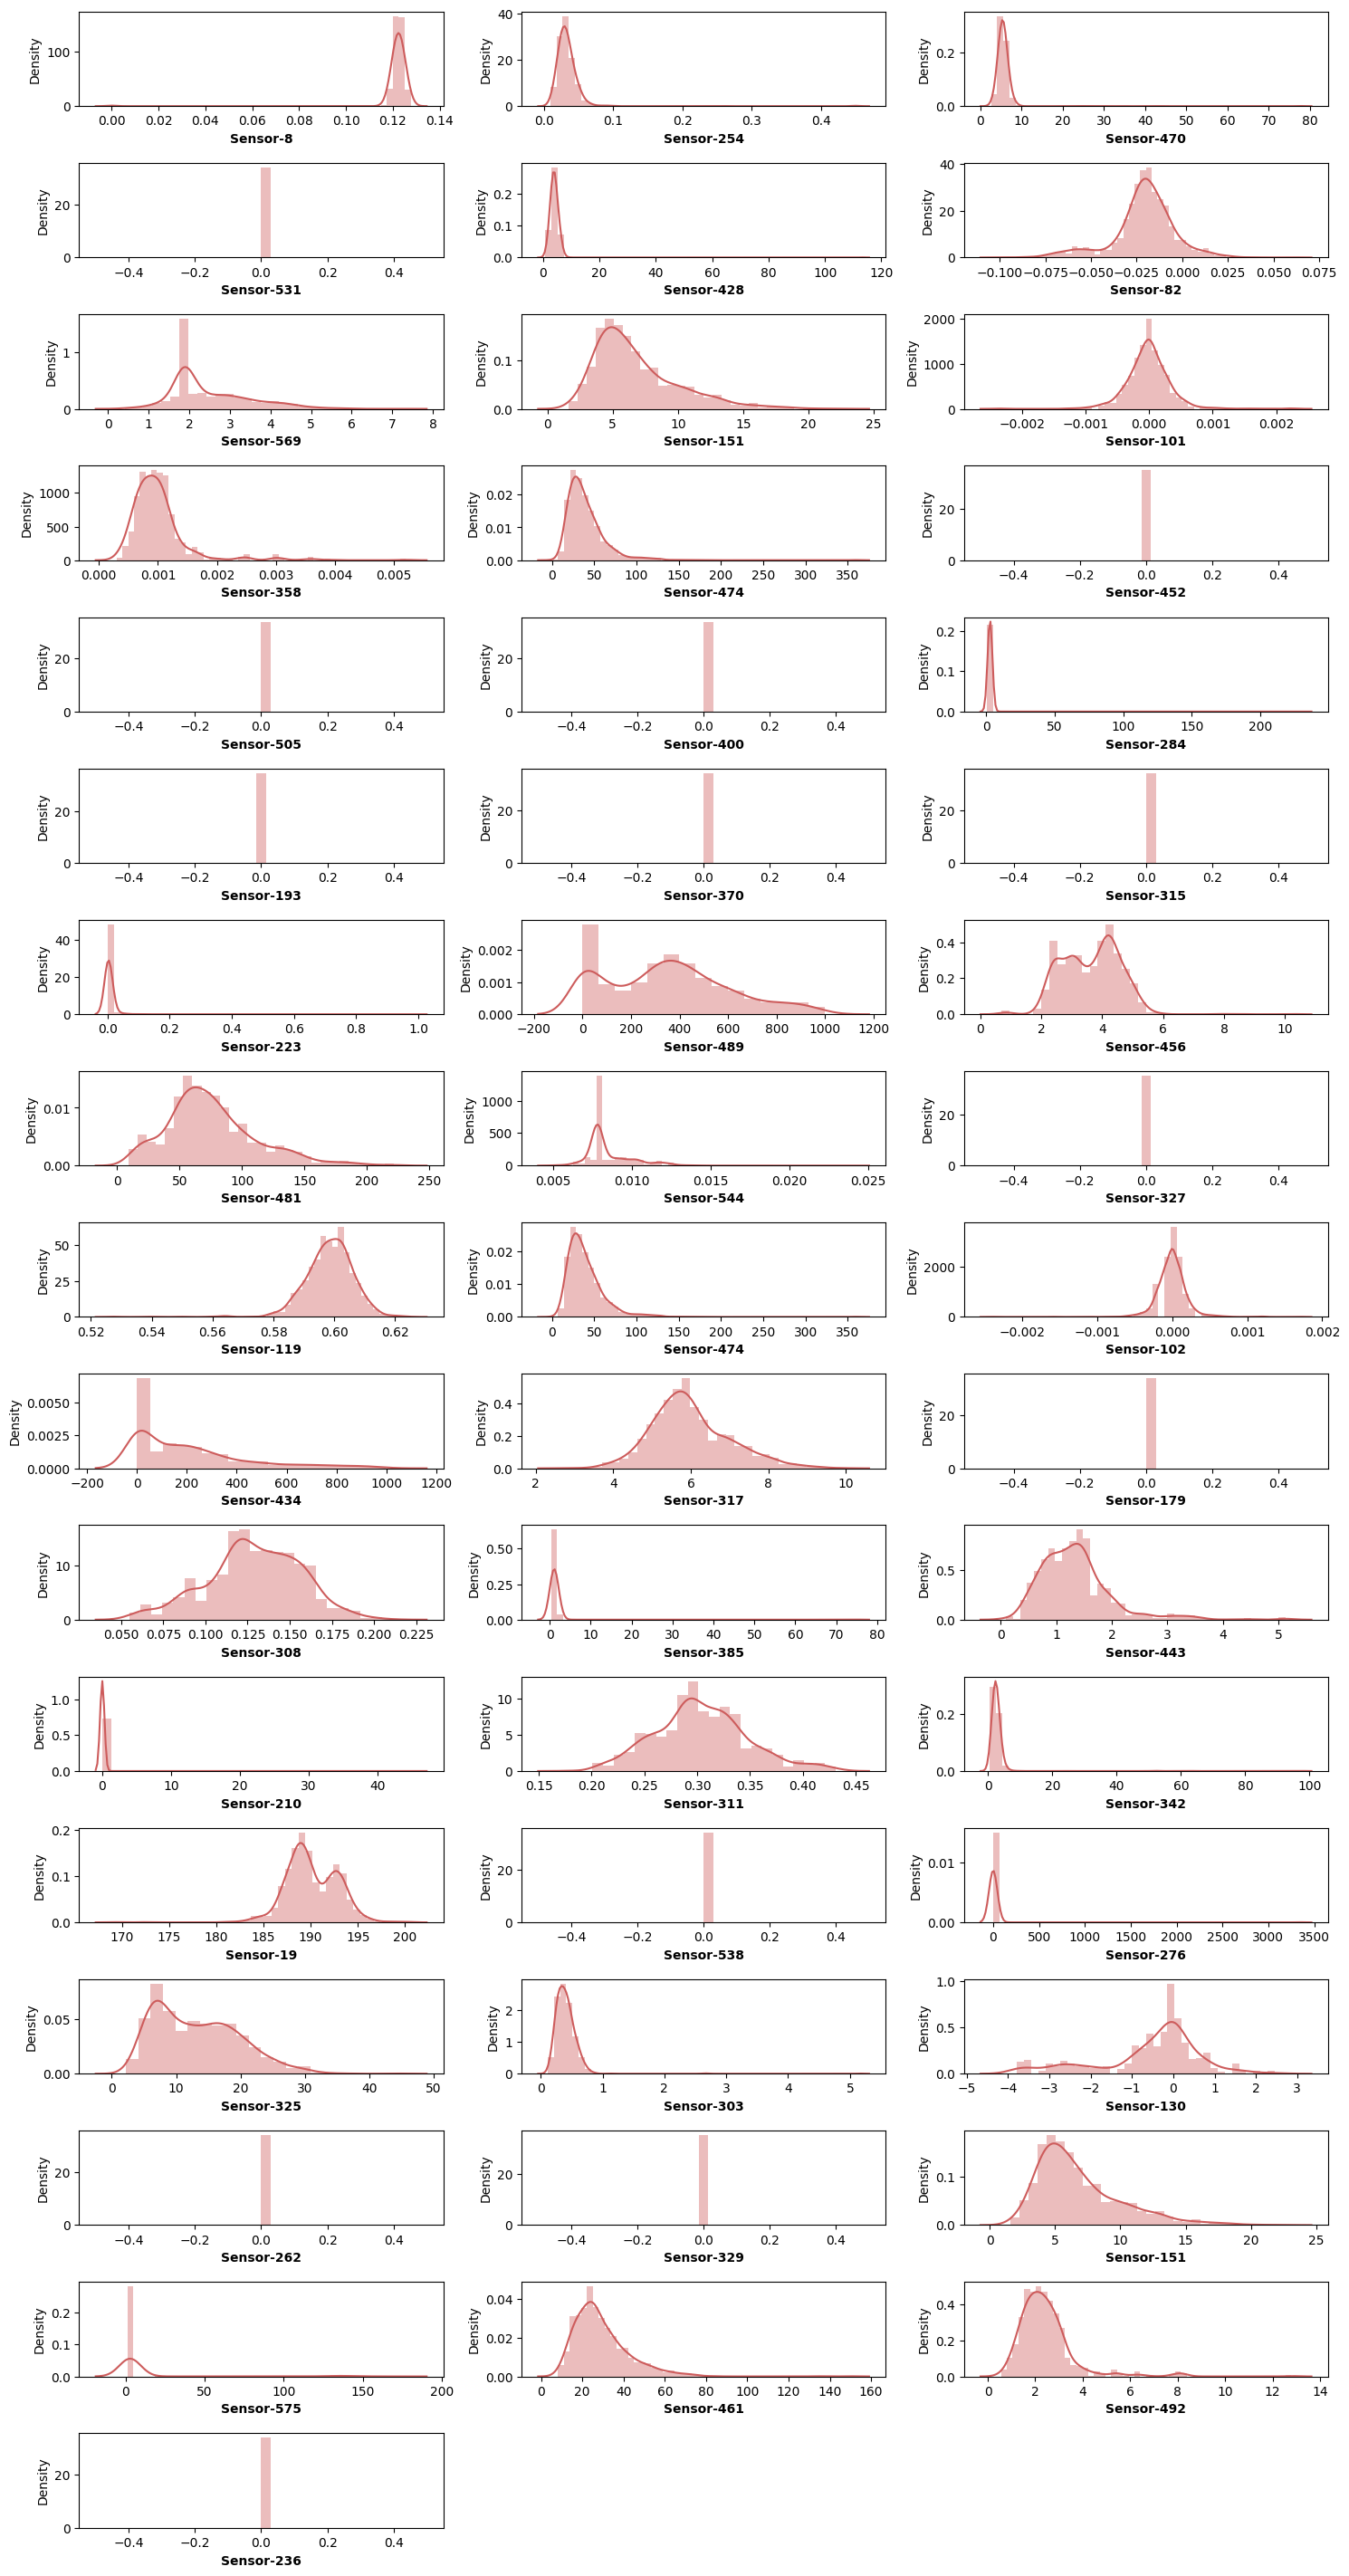

In [17]:
# let's now, have a look at the distribution of random 50 sensors

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[random_50_sensors_idx]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### Insight:

Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deviation) or have left skewness and right skewness. It ain't possible to analyze each feature and deal with its outliers individually, thus we oughta depend upon the scaling. 

For the **features with 0 standard deviation**, we can straight away drop them and for others that do have outliers, we gotta go ahead with the `Robust Scaling`.

### # Get Columns to Drop:

Will drop columns with zero standard deviation as they are not influencing the target variable in any way.

In [18]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    """
    Returns a list of columns names who are having zero standard deviation.
    """
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O']  # numerical cols only
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(df: pd.DataFrame, missing_thresh=.7):
    """
    Returns a list of columns having missing values more than certain thresh.
    """
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_thresh].index)
    return cols_to_drop        

In [19]:
## Columns w missing vals more than 70%

cols_to_drop_1 = get_redundant_cols(wafers, missing_thresh=.7)
cols_to_drop_1

['Sensor-86',
 'Sensor-158',
 'Sensor-159',
 'Sensor-221',
 'Sensor-293',
 'Sensor-294',
 'Sensor-359',
 'Sensor-493']

In [20]:
## Columns w 0 Standard Deviation

cols_to_drop_2 = get_cols_with_zero_std_dev(df=wafers)
cols_to_drop_2.append("Wafer")
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Sensor-376',
 'Sensor-379',
 'Sensor-380',
 'Sensor-381',
 'Sensor-382',
 'S

In [21]:
## Cols to drop

cols_to_drop = cols_to_drop_1 + cols_to_drop_2

**=>** Features that are not gonna contribute to ML algorithm in anyway, whatsoever.

## # Separate Features and Labels out:

In [22]:
## Separate features and Labels out

X, y = wafers.drop(cols_to_drop, axis=1), wafers[["Good/Bad"]]

In [23]:
## Dependent feature variables

print("Shape of the features now: ", X.shape)
X.head()

Shape of the features now:  (1229, 467)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
845,3059.20,2467.80,2196.0889,1277.8592,1.8246,95.6322,0.1224,1.3787,0.0025,-0.0085,...,NaN,0.5079,0.0157,0.0037,3.0854,0.0329,0.0055,0.0022,16.6695,-1
1346,3061.59,2483.44,2151.6889,1197.2643,1.5018,102.6711,0.1239,1.5271,-0.0070,0.0069,...,NaN,0.4922,0.0177,0.0038,3.5966,0.0270,0.0162,0.0051,59.9813,-1
81,2967.54,2573.09,2160.6000,1124.5821,1.5257,98.7122,0.1246,1.4750,0.0248,-0.0097,...,NaN,0.4973,0.0129,0.0030,2.6016,0.0252,0.0157,0.0046,62.3881,-1
1438,3147.74,2281.35,2171.8556,940.9917,1.2906,103.4733,0.1234,1.4867,0.0014,0.0092,...,NaN,0.4988,0.0406,0.0081,8.1423,0.0300,0.0326,0.0114,108.6076,-1
374,3020.25,2436.77,2224.0000,1510.0797,1.5611,99.8300,0.1199,1.4339,0.0032,-0.0067,...,NaN,0.4948,0.0160,0.0043,3.2343,0.0187,0.0108,0.0033,58.0827,-1


**=>** Now, we have 475 contributing features.

In [24]:
## Independent/Target Variables

print("Shape of the labels: ", y.shape)
y.head()

Shape of the labels:  (1229, 1)


,Good/Bad
845,-1
1346,-1
81,-1
1438,-1
374,-1


## # Data Transformation:

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler

imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(
    steps=[('Imputer', imputer), ('Scaler', RobustScaler())])
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [26]:
## Transform "Wafers" features

X_trans = preprocessing_pipeline.fit_transform(X)
print("Shape of transformed features set: ", X_trans.shape)
X_trans

Shape of transformed features set:  (1229, 467)


array([[ 0.52421459, -0.33753979, -0.16209278, ..., -0.77419355,
        -0.78252547,  0.        ],
       [ 0.55132131, -0.1597317 , -1.40773025, ...,  0.16129032,
        -0.16476683,  0.        ],
       [-0.51536804,  0.85948158, -1.15773025, ...,  0.        ,
        -0.1304385 ,  0.        ],
       ...,
       [-0.51502779,  0.26625739, -0.8344733 , ...,  1.70967742,
         1.13024453,  0.        ],
       [-0.84734037, -0.57082765, -0.02244111, ...,  2.58064516,
         0.30276475,  0.        ],
       [ 0.03050924,  0.4771487 ,  0.06795738, ..., -0.29032258,
        -1.02028349,  0.        ]])

## # Shall we cluster "Wafers" instances?

Let's see whether clustering of data instances do us any good. 

In [27]:
%pip install kneed

  Using cached kneed-0.8.5-py3-none-any.whl.metadata (5.5 kB)
Using cached kneed-0.8.5-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass


@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by 
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(
                f'Getting the ideal number of clusters to cluster "{self.desc} set" into..')

            ####################### Compute WCSS for shortlisted number of clusters ##########################
            print("computing WCSS for shortlisted number of clusters..")
            wcss = []  # Within Summation of Squares
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++',
                                random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print(
                "WCSS computed successfully for all shortlisted number of clusters!")

            ################### Finalize dispersal point as the ideal number of clusters #####################
            print(
                "Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(
                range(1, 11), wcss, curve='convex', direction='decreasing')  # range(1, 11) vs WCSS
            print(
                f"Ideal number of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset 
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(
                f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans, np.c_[self.X, y_kmeans]
            ...
        except Exception as e:
            print(e)
            raise e

In [29]:
## Cluster `Wafer` instances

cluster_wafers = ClusterDataInstances(X=X_trans, desc="wafers features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting the ideal number of clusters to cluster "wafers features set" into..
computing WCSS for shortlisted number of clusters..
WCSS for n_clusters=1: 151231094887.66278
WCSS for n_clusters=2: 12841608313.732298
WCSS for n_clusters=3: 3911353179.8725624
WCSS for n_clusters=4: 419700703.3631864
WCSS for n_clusters=5: 189009464.4668641
WCSS for n_clusters=6: 78305840.38017675
WCSS for n_clusters=7: 55051482.69850009
WCSS for n_clusters=8: 42514863.93436999
WCSS for n_clusters=9: 31637974.86266208
WCSS for n_clusters=10: 17911539.07155111
WCSS computed successfully for all shortlisted number of clusters!
Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 2
Dividing the "wafers features" instances into 2 clusters via KMeans Clustering algorithm..
..said data instances divided into 2 clusters successfully!


array([[ 0.52421459, -0.33753979, -0.16209278, ..., -0.78252547,
         0.        ,  0.        ],
       [ 0.55132131, -0.1597317 , -1.40773025, ..., -0.16476683,
         0.        ,  0.        ],
       [-0.51536804,  0.85948158, -1.15773025, ..., -0.1304385 ,
         0.        ,  0.        ],
       ...,
       [-0.51502779,  0.26625739, -0.8344733 , ...,  1.13024453,
         0.        ,  0.        ],
       [-0.84734037, -0.57082765, -0.02244111, ...,  0.30276475,
         0.        ,  0.        ],
       [ 0.03050924,  0.4771487 ,  0.06795738, ..., -1.02028349,
         0.        ,  0.        ]])

In [30]:
## Clusters

np.unique(X_clus[:, -1])

array([0., 1.])

**=>** So the dataset was divided into 3 optimal clusters.

Let's have a look at their shapes..

In [31]:
## Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus, y]

## Cluster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(1224, 469)

**=>** Perhaps we were wrong about dividing the `Wafers` dataset into clusters, as we can see pretty much of all datapoints lie in the first cluster itself.

Let's take look at another clusters anyway..

In [32]:
## Cluster_2 data

wafers_clus[wafers_clus[:, -2] == 1].shape

(5, 469)

**=>** Man, seriously?!

In [33]:
## Cluster_3 data

wafers_clus[wafers_clus[:, -2] == 2].shape

(0, 469)

**=>** Thus we mustn't divide the dataset into clusters. Not a good idea!

## # Resampling of Training Instances:

Resampling is imperative in this case as the target variable is highly imbalanced.

In [34]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from imblearn.combine import SMOTETomek

X, y = X_trans[:, :-1], y
resampler = SMOTETomek(sampling_strategy="auto")
X_res, y_res = resampler.fit_resample(X, y)

In [36]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (1229, 467)
After resampling, Shape of training instances:  (2306, 467)


In [37]:
## Target Cats after Resampling

print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")

[-1  1]
Value Counts: 
-1: 2306, 1: 2306


**=>** Exactly what we wanted!

### # Prepare the Test set:

Do exactly the same to test set whatever's been done to the test set.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=1/3, random_state=42)

print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((1537, 466), (1537, 1))
test set: ((769, 466), (769, 1))


In [39]:
# # fetch only features that were used in training
# X_test, y_test = wafers_test[preprocessing_pipeline.feature_names_in_], wafers_test.iloc[:, -1]

# ## Transform the Test features
# X_test_trans = preprocessing_pipeline.transform(X_test)
# print(X_test_trans.shape, y_test.shape)

# ## Cluster the test features
# y_test_kmeans = clusterer.predict(X_test_trans)

# ## Configure the test array
# test_arr = np.c_[X_test_trans, y_test, y_test_kmeans]
# np.unique(y_test_kmeans)

In [40]:
# # Prepare the test features and test labels for cluster one

# X_test_prep, y_test_prep = test_arr[test_arr[:, -2] == ], test_arr[:, -1]
# print(X_test_prep.shape)

## # Model Selection and Training:

In [41]:
# %pip install xgboost==0.90

In [42]:
# # Prepared training sets

# X_prep = wafers_1[:, :-2]
# y_prep = wafers_1[:, -1]
# print(X_prep.shape, y_prep.shape)

In [43]:
# Prepared training and test sets

X_prep = X_train
y_prep = y_train
X_test_prep = X_test
y_test_prep = y_test

print(X_prep.shape, y_prep.shape)
print(X_test_prep.shape, y_test_prep.shape)

(1537, 466) (1537, 1)
(769, 466) (769, 1)


In [44]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

# Shortlisted base Models
svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')

In [45]:
## A function to display Scores

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

### # Evaluating `SVC (kernel='linear')` using cross-validation:

In [46]:
## SVC Scores

svc_scores = cross_val_score(svc_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   4.0s
[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time= 1.1min
[CV] END .................................................... total time=  24.7s
[CV] END .................................................... total time=  22.6s
[CV] END .................................................... total time=  15.4s
[CV] END .................................................... total time=  27.8s
[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=  19.1s
[CV] END .................................................... total time=  32.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.6min finished


In [47]:
display_scores(svc_scores)

Scores:  [0.94316074 0.94214876 0.8758644  0.93135436 0.93219767 0.94635628
 0.91295547 0.87662338 0.92549556 0.96514012]
Mean:  0.9251296721050652
Standard Deviation:  0.027718496013683362


In [48]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_preds = cross_val_predict(svc_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_auc = roc_auc_score(y_test_prep, svc_preds)
svc_auc

np.float64(0.9084341261466028)

### # Evaluating `SVC (kernel='rbf')` using cross-validation:

In [49]:
## SVC rbf Scores

svc_rbf_scores = cross_val_score(svc_rbf_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.9s finished


In [50]:
display_scores(svc_rbf_scores)

Scores:  [0.66469894 0.62793051 0.62270197 0.6878057  0.5623208  0.64051957
 0.72553981 0.64712919 0.63721805 0.62252221]
Mean:  0.6438386744265077
Standard Deviation:  0.04111981045583824


In [51]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_rbf_preds = cross_val_predict(svc_rbf_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_rbf_auc = roc_auc_score(y_test_prep, svc_rbf_preds)
svc_rbf_auc

np.float64(0.505249343832021)

### # Evaluating `RandomForestClassifier` using cross-validation:

In [52]:
## Random Forest Scores

random_clf_scores = cross_val_score(random_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.6s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   24.4s finished


In [53]:
display_scores(random_clf_scores)

Scores:  [0.99966267 0.99966267 0.99991567 0.99932535 1.         0.99983131
 1.         1.         1.         1.        ]
Mean:  0.9998397677738075
Standard Deviation:  0.00021483801373935066


In [54]:
## Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_test_prep, random_clf_preds)
random_clf_auc

np.float64(0.9686696701572096)